In [1]:
from kalkulator import Kalkulator
from mytypes import *


In [2]:
kredyt1=Kalkulator(kwota_kredytu=400000,ilosc_lat=30,stopa_procentowa=6.6,rodzaj_rat=RodzajRat.rowne,wskaznikBGK=7.14)

In [3]:
df=kredyt1.harmonogram_to_DF()
df

,Numer raty,Kapitał na początku okresu,Rata kapitałowa,Rata odsetkowa,Dopłata,Rata łączna,Kapitał na koniec okresu
0,1,400000.00,354.64,2200.00,0.0,2554.64,399645.36
1,2,399645.36,356.59,2198.05,0.0,2554.64,399288.77
2,3,399288.77,358.55,2196.09,0.0,2554.64,398930.22
3,4,398930.22,360.52,2194.12,0.0,2554.64,398569.70
4,5,398569.70,362.51,2192.13,0.0,2554.64,398207.19
...,...,...,...,...,...,...,...
354,355,15031.79,2471.97,82.67,0.0,2554.64,12559.82
355,356,12559.82,2485.56,69.08,0.0,2554.64,10074.26
356,357,10074.26,2499.23,55.41,0.0,2554.64,7575.03
357,358,7575.03,2512.98,41.66,0.0,2554.64,5062.05


In [4]:
import math
df['rok']=df['Numer raty'].apply(lambda x:math.ceil(x/12))
# show=df.groupby('rok')[['Rata odsetkowa','Rata kapitałowa']].sum()
# show.reset_index(inplace=True)
show = df[df['Numer raty']%12==0]


Text(0, 0.5, 'Number of Customers')

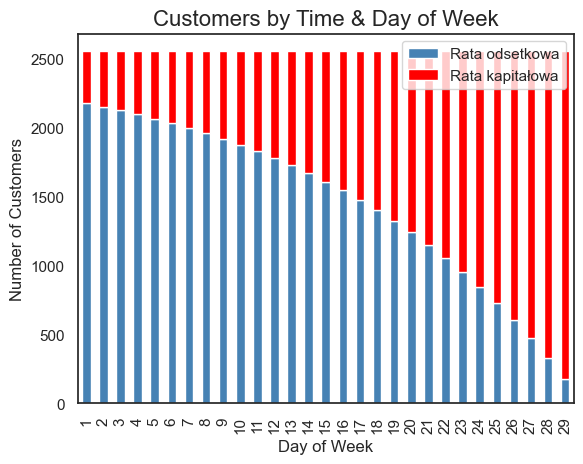

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

#set seaborn plotting aesthetics
sns.set(style='white')

#create stacked bar chart
show.plot(kind='bar',x='rok',y=['Rata odsetkowa','Rata kapitałowa'], stacked=True, color=['steelblue', 'red'])

#add overall title
plt.title('Customers by Time & Day of Week', fontsize=16)

#add axis titles
plt.xlabel('Day of Week')
plt.ylabel('Number of Customers')

#rotate x-axis labels
# plt.xticks(rotation=45)

In [6]:
kredyt2=Kalkulator(kwota_kredytu=400000,ilosc_lat=20,stopa_procentowa=8.46,rodzaj_rat=RodzajRat.malejace)
df=kredyt2.harmonogram_to_DF()
df['rok']=df['Numer raty'].apply(lambda x:math.ceil(x/12))
show=df.groupby('rok')[['Rata odsetkowa','Rata kapitałowa']].sum()
show.reset_index(inplace=True)

<Axes: xlabel='rok'>

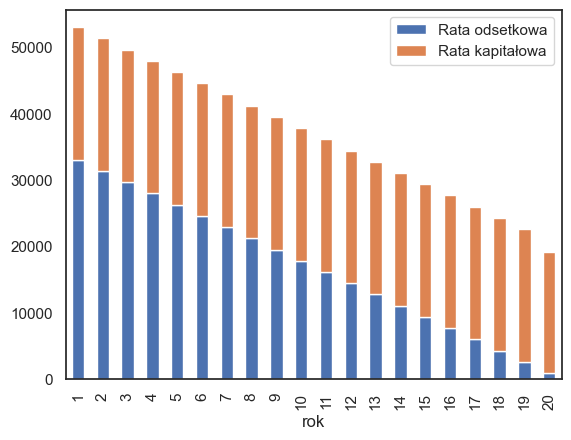

In [7]:
show.plot(kind='bar',x='rok',y=['Rata odsetkowa','Rata kapitałowa'], stacked=True)


In [23]:
gov=8.46
ile=20
bgk=gov*0.9
kredyt=250000

kredyt3=Kalkulator(kwota_kredytu=kredyt,ilosc_lat=ile,stopa_procentowa=gov,rodzaj_rat=RodzajRat.malejace,wskaznikBGK=bgk)
df=kredyt3.harmonogram_to_DF()
df['Odsetki_po'] = df['Rata odsetkowa']-df['Dopłata']
df['po_laczna'] = df['Rata kapitałowa']+df['Odsetki_po']


In [24]:
df

,Numer raty,Kapitał na początku okresu,Rata kapitałowa,Rata odsetkowa,Dopłata,Rata łączna,Kapitał na koniec okresu,Odsetki_po,po_laczna
0,1,250000.00,1041.67,1762.50,1169.58,2804.17,248958.33,592.92,1634.59
1,2,248958.33,1041.67,1755.16,1164.71,2796.83,247916.66,590.45,1632.12
2,3,247916.66,1041.67,1747.81,1159.84,2789.48,246874.99,587.97,1629.64
3,4,246874.99,1041.67,1740.47,1154.96,2782.14,245833.32,585.51,1627.18
4,5,245833.32,1041.67,1733.12,1150.09,2774.79,244791.65,583.03,1624.70
...,...,...,...,...,...,...,...,...,...
234,235,6249.22,1041.67,44.06,0.00,1085.73,5207.55,44.06,1085.73
235,236,5207.55,1041.67,36.71,0.00,1078.38,4165.88,36.71,1078.38
236,237,4165.88,1041.67,29.37,0.00,1071.04,3124.21,29.37,1071.04
237,238,3124.21,1041.67,22.03,0.00,1063.70,2082.54,22.03,1063.70


In [25]:
round(df['Dopłata'].sum())

105555

<Axes: xlabel='Numer raty'>

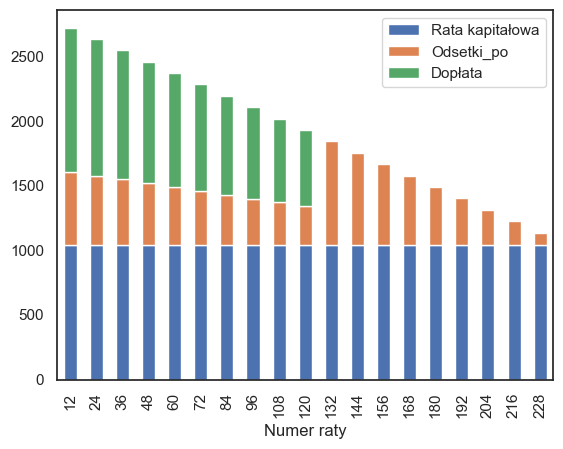

In [26]:
show = df[df['Numer raty']%12==0]
show.plot(kind='bar',x='Numer raty',y=['Rata kapitałowa','Odsetki_po','Dopłata'], stacked=True)

In [27]:
po=df.loc[120,'Kapitał na początku okresu']
ile=ile-10
kredyt3po=Kalkulator(kwota_kredytu=po,ilosc_lat=ile,stopa_procentowa=gov,rodzaj_rat=RodzajRat.rowne)

dfpo=kredyt3po.harmonogram_to_DF()
display(dfpo['Rata odsetkowa'].sum())
dfpo

60647.02999999999

,Numer raty,Kapitał na początku okresu,Rata kapitałowa,Rata odsetkowa,Dopłata,Rata łączna,Kapitał na koniec okresu
0,1,124999.60,665.89,881.25,0.0,1547.14,124333.71
1,2,124333.71,670.59,876.55,0.0,1547.14,123663.12
2,3,123663.12,675.32,871.82,0.0,1547.14,122987.80
3,4,122987.80,680.08,867.06,0.0,1547.14,122307.72
4,5,122307.72,684.87,862.27,0.0,1547.14,121622.85
...,...,...,...,...,...,...,...
114,115,9058.66,1483.28,63.86,0.0,1547.14,7575.38
115,116,7575.38,1493.73,53.41,0.0,1547.14,6081.65
116,117,6081.65,1504.26,42.88,0.0,1547.14,4577.39
117,118,4577.39,1514.87,32.27,0.0,1547.14,3062.52
